# Twitch Streamer Success Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/twitch-data-all.csv')
# exclude rows without earnings 
data = data[data['earnings_usd'].notnull()]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           788 non-null    int64  
 1   channel              788 non-null    object 
 2   watch_time_minutes   788 non-null    int64  
 3   stream_time_minutes  788 non-null    int64  
 4   peak_viewers         788 non-null    int64  
 5   average_viewers      788 non-null    int64  
 6   followers            788 non-null    int64  
 7   followers_gained     788 non-null    int64  
 8   views_gained         788 non-null    int64  
 9   partnered            788 non-null    bool   
 10  mature               788 non-null    bool   
 11  language             788 non-null    object 
 12  ranking              788 non-null    float64
 13  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(8), object(2)
memory usage: 81.6+ KB


## Correlation with Earnings

In [5]:
metrics = [
    'watch_time_minutes', 
    'stream_time_minutes', 
    'peak_viewers', 
    'average_viewers', 
    'followers'
]

correlation_results = {}
for metric in metrics:
    correlation_results[metric] = data[metric].corr(data['earnings_usd'], method='spearman')

# Sort correlations
sorted_correlations = sorted(
    correlation_results.items(), 
    key=lambda x: abs(x[1]), reverse=True
    )


In [6]:
sorted_correlations

[('watch_time_minutes', np.float64(0.47118545445342014)),
 ('followers', np.float64(0.34287021170706533)),
 ('average_viewers', np.float64(0.31782946283013336)),
 ('peak_viewers', np.float64(0.2761893947689601)),
 ('stream_time_minutes', np.float64(0.13446399058056213))]

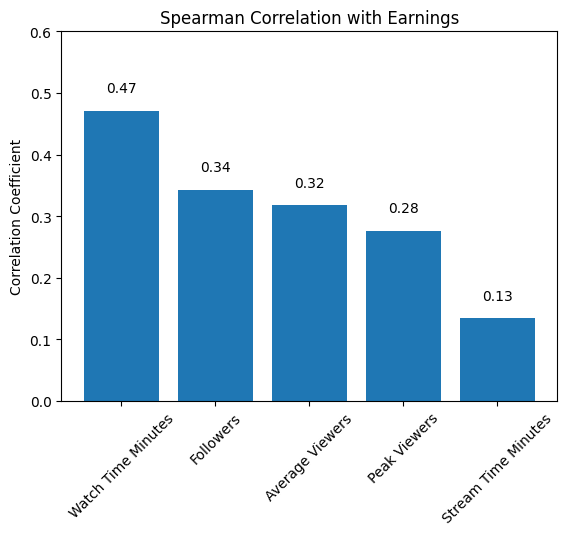

In [7]:
plt.bar(range(len(sorted_correlations)), [x[1] for x in sorted_correlations])
plt.xticks(
    range(len(sorted_correlations)), 
    [x[0].replace('_', ' ').title() for x in sorted_correlations], 
    rotation=45
    )
plt.ylabel('Correlation Coefficient')
plt.title('Spearman Correlation with Earnings')
plt.ylim(0, 0.6)

for i, v in enumerate([x[1] for x in sorted_correlations]):
    plt.text(i, v + 0.03, f'{v:.2f}', ha='center')

## Scatterplot top metrics vs earnings

Text(0.5, 1.0, 'Earnings vs. Watch Time')

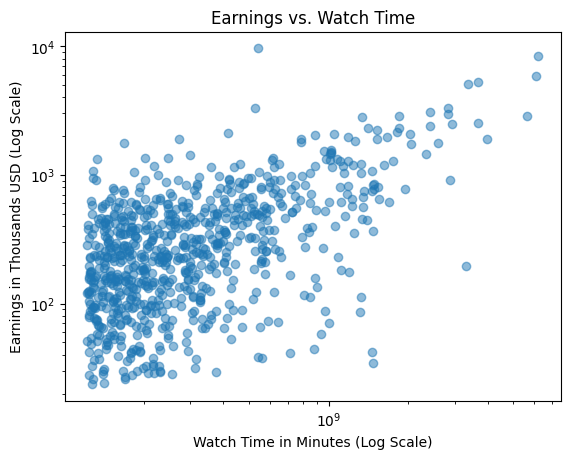

In [8]:
plt.scatter(data['watch_time_minutes'], data['earnings_usd'] / 1000, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Watch Time in Minutes (Log Scale)')
plt.ylabel('Earnings in Thousands USD (Log Scale)')
plt.title('Earnings vs. Watch Time')

Text(0.5, 1.0, 'Earnings vs. Followers')

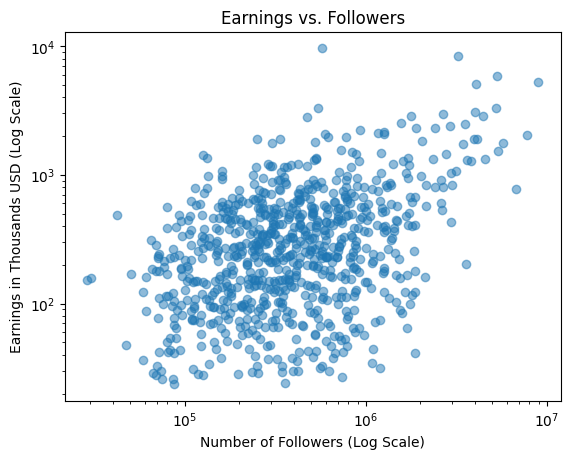

In [9]:
plt.scatter(data['followers'], data['earnings_usd'] / 1000, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Followers (Log Scale)')
plt.ylabel('Earnings in Thousands USD (Log Scale)')
plt.title('Earnings vs. Followers')

Text(0.5, 1.0, 'Earnings vs. Average Viewers')

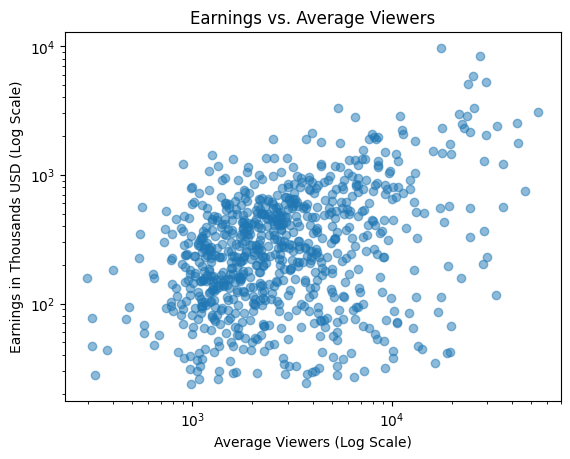

In [10]:
plt.scatter(data['average_viewers'], data['earnings_usd'] / 1000, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Average Viewers (Log Scale)')
plt.ylabel('Earnings in Thousands USD (Log Scale)')
plt.title('Earnings vs. Average Viewers')

## Earnings by Average Viewers

In [11]:
data['average_viewers'].min()

np.int64(297)

In [12]:
viewership_bins = [100, 500, 1000, 5000, 10000, float('inf')]
data['viewer_bracket'] = pd.cut(
        data['average_viewers'], 
        viewership_bins, 
        labels=['100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
    )

earnings_by_viewers = data.groupby('viewer_bracket')['earnings_usd'].agg(['mean', 'count'])
earnings_by_viewers['mean'] = earnings_by_viewers['mean'] / 1000  # Convert to thousands for readability

<positron-console-cell-12>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [13]:
earnings_by_viewers

,mean,count
viewer_bracket,,
100-500,88.452758,8
500-1000,240.562171,57
1000-5000,332.793297,529
5000-10000,597.526188,121
10000+,1374.638303,73


<positron-console-cell-14>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


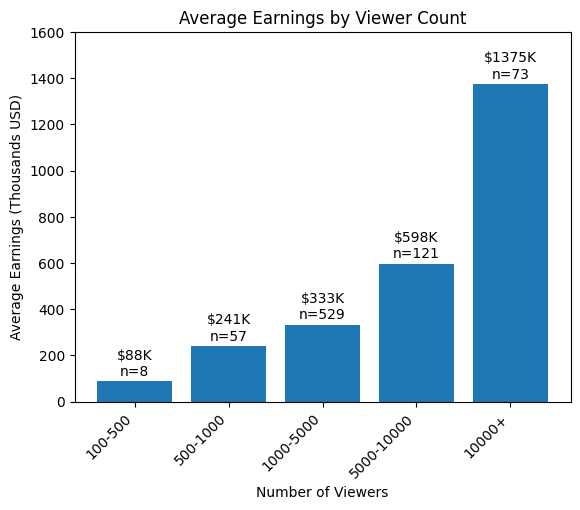

In [14]:
plt.bar(range(len(earnings_by_viewers)), earnings_by_viewers['mean'])
plt.xticks(range(len(earnings_by_viewers)), earnings_by_viewers.index, rotation=45, ha='right')
plt.title('Average Earnings by Viewer Count')
plt.xlabel('Number of Viewers')
plt.ylabel('Average Earnings (Thousands USD)')
plt.ylim(0, 1600)

for i, v in enumerate(earnings_by_viewers['mean']):
    plt.text(i, v + 25, f'${v:.0f}K\nn={earnings_by_viewers["count"][i]}', ha='center')

## Earnings by Languages

In [15]:
language_stats = data.groupby('language').agg({
    'earnings_usd': 'mean',
    'channel': 'count',
    'average_viewers': 'mean'
}).rename(columns={'channel': 'streamer_count'}).sort_values('streamer_count', ascending=False)

top_languages = language_stats.head(10).copy()
top_languages['earnings_usd'] = top_languages['earnings_usd'] / 1000  # Convert to thousands


In [16]:
top_languages
# language_stats

,earnings_usd,streamer_count,average_viewers
language,,,
English,581.370712,445,4622.038202
French,342.209009,63,3542.761905
Spanish,357.708270,61,6745.311475
Portuguese,286.801881,52,3711.288462
German,514.356439,47,4351.234043
Russian,79.104297,38,5432.973684
Turkish,148.280912,19,4803.736842
Italian,447.856747,16,2263.812500
Polish,138.548590,11,2651.636364


<positron-console-cell-17>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


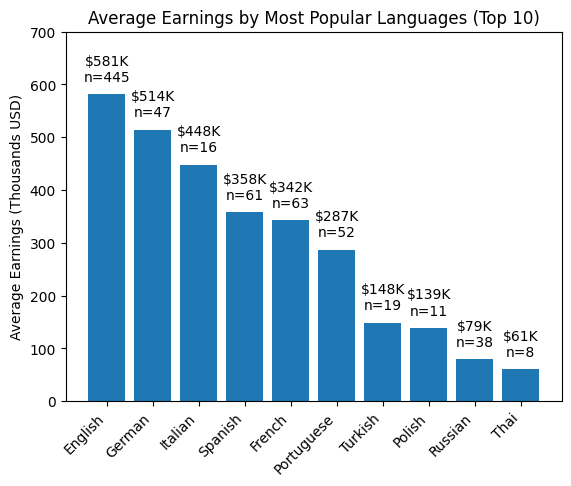

In [17]:
top_languages = top_languages.sort_values('earnings_usd', ascending=False)

plt.bar(range(len(top_languages)), top_languages['earnings_usd'])
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Average Earnings by Most Popular Languages (Top 10)')
plt.ylabel('Average Earnings (Thousands USD)')
plt.ylim(0, 700)

for i, v in enumerate(top_languages['earnings_usd']):
    plt.text(i, v + 25, f'${v:.0f}K\nn={top_languages["streamer_count"][i]}', ha='center')

<positron-console-cell-20>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


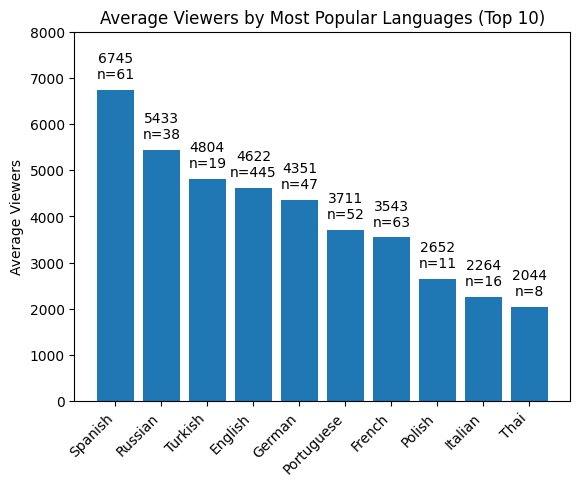

In [20]:
top_languages = top_languages.sort_values('average_viewers', ascending=False)

plt.bar(range(len(top_languages)), top_languages['average_viewers'])
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Average Viewers by Most Popular Languages (Top 10)')
plt.ylabel('Average Viewers')
plt.ylim(0, 8000)

for i, v in enumerate(top_languages['average_viewers']):
    plt.text(i, v + 250, f'{v:.0f}\nn={top_languages["streamer_count"][i]}', ha='center')

Although Spanish language channels have the most views, they only rank fourth in terms of earnings. Similarly, russian channels rank second for average viewers but ninth in average earnings. 

English, German, and Italian channesl seem to have the best ratio of earnings per viewer.

## Partnered vs Non-Partnered Earnings

In [75]:
partner_stats = data.groupby('partnered')['earnings_usd'].agg(['mean', 'count'])
partner_stats['mean'] = partner_stats['mean'] / 1000  # Convert to thousands

In [76]:
partner_stats

,mean,count
partnered,,
False,115.696676,7
True,463.901035,781


<positron-console-cell-80>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


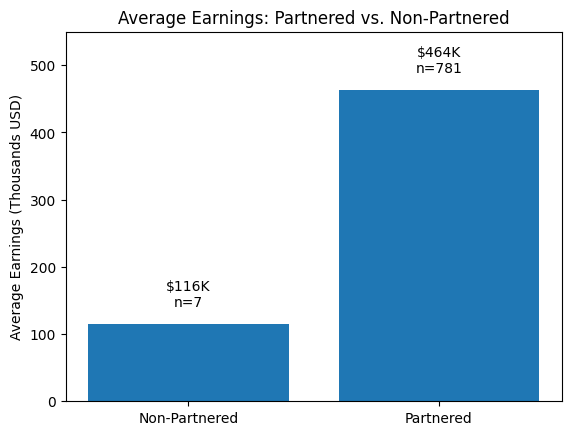

In [80]:
partner_labels = ['Non-Partnered', 'Partnered']
plt.bar(range(len(partner_stats)), partner_stats['mean'])
plt.xticks(range(len(partner_stats)), partner_labels)
plt.title('Average Earnings: Partnered vs. Non-Partnered')
plt.ylabel('Average Earnings (Thousands USD)')
plt.ylim(0, 550)

for i, v in enumerate(partner_stats['mean']):
    plt.text(i, v + 25, f'${v:.0f}K\nn={partner_stats["count"][i]}', ha='center')

## Stream time analysis

In [83]:
stream_time_bins = [5000, 10000, 20000, 50000, 100000, float('inf')]
data['stream_time_bracket'] = pd.cut(data['stream_time_minutes'], stream_time_bins, 
                                   labels=['5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+'])

stream_time_stats = data.groupby('stream_time_bracket')['earnings_usd'].agg(['mean', 'count'])
stream_time_stats['mean'] = stream_time_stats['mean'] / 1000  # Convert to thousands

<positron-console-cell-83>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [84]:
stream_time_stats

,mean,count
stream_time_bracket,,
5K-10K,41.409010,1
10K-20K,158.004320,15
20K-50K,466.056739,65
50K-100K,410.115319,254
100K+,499.430755,453


<positron-console-cell-88>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


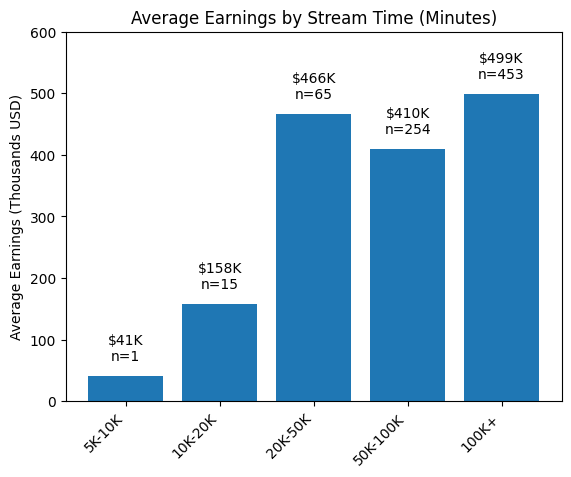

In [88]:
plt.bar(range(len(stream_time_stats)), stream_time_stats['mean'])
plt.xticks(range(len(stream_time_stats)), stream_time_stats.index, rotation=45, ha='right')
plt.title('Average Earnings by Stream Time (Minutes)')
plt.ylabel('Average Earnings (Thousands USD)')
plt.ylim(0, 600)

for i, v in enumerate(stream_time_stats['mean']):
    plt.text(i, v + 25, f'${v:.0f}K\nn={stream_time_stats["count"][i]}', ha='center')

While stream time did not strongly correlate strongly with earnings, it is possible that streaming too little does impact earnings. Recommended streaming at least 20-50k minutes per year to reach the plateau in earnings.

## Mature vs Non-mature content

In [93]:
mature_stats = data.groupby('mature')['earnings_usd'].agg(['mean', 'count'])
mature_stats['mean'] = mature_stats['mean'] / 1000  # Convert to thousands

<positron-console-cell-98>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


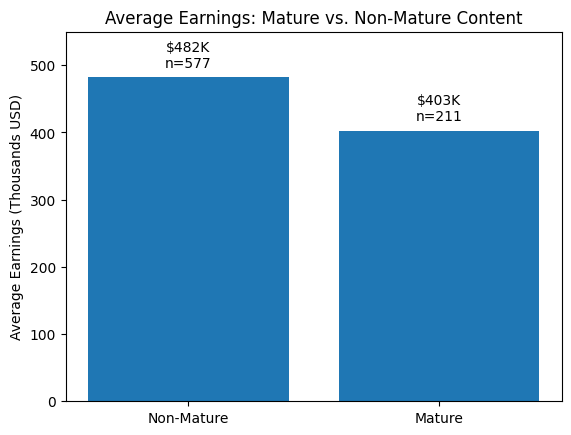

In [98]:
mature_labels = ['Non-Mature', 'Mature']
plt.bar(range(len(mature_stats)), mature_stats['mean'])
plt.xticks(range(len(mature_stats)), mature_labels)
plt.title('Average Earnings: Mature vs. Non-Mature Content')
plt.ylabel('Average Earnings (Thousands USD)')
plt.ylim(0, 550)

for i, v in enumerate(mature_stats['mean']):
    plt.text(i, v + 15, f'${v:.0f}K\nn={mature_stats["count"][i]}', ha='center')
